### INTRODUCTION

Nestle is a multinational food and beverage company that operates in over 190 countries and employs more than 300,000 people worldwide. As a major player in the global food industry, Nestle's stock performance is influenced by various factors, including economic conditions, regulatory changes, and consumer sentiment. In this project, we aim to build regression models to analyze the correlation between the sentiment score of daily tweets related to Nestle and the stock trend of the company.

### HYPOTHESIS

The hypothesis of this project is that there is a significant correlation between the sentiment score of daily tweets related to Nestle and the stock trend of the company. We expect to see a positive correlation between the sentiment score and the stock trend, indicating that Nestle is more likely to experience an upward stock trend when the sentiment score is positive.

### BUSINESS PROBLEM

The business problem that this project aims to solve is to provide traders and investors with an accurate and reliable tool to predict stock trends for Nestle based on social media data. By building regression models to analyze the correlation between sentiment scores and stock trends, traders and investors can gain insights into the relationship between public sentiment and market trends for Nestle, and make better-informed investment decisions. This can help minimize risk, maximize profits, and provide a competitive edge in the highly dynamic and unpredictable world of finance for Nestle.

In [1]:
# Data Import and Manipulation:
import pandas as pd
import numpy as np
import yfinance as yf

# Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Validation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Regression Models:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics:
from sklearn.metrics import r2_score, mean_squared_error

# Statistical Analysis:
import itertools
from itertools import combinations
from scipy.stats import pearsonr

In [2]:
# Read the dataset
data = pd.read_csv('Nestle daily tweets.csv')
data.head()

,Unnamed: 0,Date,Weighted_Sentiment_Score,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Polarity,Tweet Volume
0,0,2010-01-01,197.1688,0,0,2554,0.077200,positive,1
1,1,2010-01-02,0.0000,0,0,503,0.000000,neutral,1
2,2,2010-01-03,0.0000,0,0,176,0.000000,neutral,2
3,3,2010-01-04,63240.8392,0,0,73802,0.856899,positive,3
4,4,2010-01-05,-101.4030,0,0,910,-0.111432,negative,2


In [3]:
# Drop the columns 'Weighted_Sentiment_Score','Unnamed: 0','Polarity'
daily = data.drop(['Weighted_Sentiment_Score','Unnamed: 0','Polarity'],axis=1)
daily.head()

,Date,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
0,2010-01-01,0,0,2554,0.077200,1
1,2010-01-02,0,0,503,0.000000,1
2,2010-01-03,0,0,176,0.000000,2
3,2010-01-04,0,0,73802,0.856899,3
4,2010-01-05,0,0,910,-0.111432,2


In [4]:
# convert the 'Date' column of a pandas DataFrame named daily to a datetime format
daily['Date'] = pd.to_datetime(daily['Date'])

# set the 'Date' column as the index of the DataFrame
daily = daily.set_index('Date')

In [5]:
daily.head(3)

,Like Count,Retweet Count,Follower Count,Daily_Avg_Sentiment_Score,Tweet Volume
Date,,,,,
2010-01-01,0,0,2554,0.0772,1
2010-01-02,0,0,503,0.0000,1
2010-01-03,0,0,176,0.0000,2


### WEEKLY TWITTER DATA

In [6]:
# returns the weighted average of the 'Daily_Avg_Sentiment_Score' column by the 'Tweet Volume' column
def weighted_avg(x):
    return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()

# daily DataFrame is resampled on weekly basis using the resample() method with the argument 'W' to indicate weekly frequency
weekly = daily.resample('W').apply(weighted_avg)

C:\Users\HP\AppData\Local\Temp/ipykernel_21656/1129608819.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()


In [7]:
# Convert to dataframe
weekly = pd.DataFrame(weekly)
weekly.head()

,0
Date,
2010-01-03,0.019300
2010-01-10,0.150170
2010-01-17,0.099242
2010-01-24,0.124085
2010-01-31,0.207578


In [8]:
# Rename the columns '0'
weekly.rename(columns={0: 'Weighted_Avg_Sentiment_Score'}, inplace=True)
weekly.head(3)

,Weighted_Avg_Sentiment_Score
Date,
2010-01-03,0.019300
2010-01-10,0.150170
2010-01-17,0.099242


In [9]:
# data is resampled at a weekly frequency ('W') and mean value of the 'Follower Count' is calculated for each week 
weekly['Mean Follower Count'] = daily['Follower Count'].resample('W').mean()

#data is resampled at a weekly frequency ('W') and mean value of the 'Like Count' is calculated for each week 
weekly['Mean Like Count'] = daily['Like Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Retweet Count' is calculated for each week 
weekly['Mean Retweet Count'] = daily['Retweet Count'].resample('W').mean()

# data is resampled at a weekly frequency ('W') and mean value of the 'Tweet Volume' is calculated for each week 
weekly['Weekly Tweet Volume'] = daily['Tweet Volume'].resample('W').mean()

In [10]:
# Column names of the dataframe 'weekly'
weekly.columns

Index(['Weighted_Avg_Sentiment_Score', 'Mean Follower Count',
       'Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume'],
      dtype='object')

In [11]:
weekly.head()

,Weighted_Avg_Sentiment_Score,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume
Date,,,,,
2010-01-03,0.019300,1077.666667,0.0,0.000000,1.333333
2010-01-10,0.150170,35415.857143,0.0,0.571429,12.857143
2010-01-17,0.099242,72615.000000,0.5,0.666667,21.666667
2010-01-24,0.124085,5257.750000,0.0,0.000000,3.000000
2010-01-31,0.207578,1790.666667,0.0,0.000000,2.333333


In [12]:
# calculate the mean sentiment score for each week
weekly['Mean Sentiment Score'] =  daily.resample('W').apply(weighted_avg)

# Drop the repeated column 'Weighted_Avg_Sentiment_Score'
weekly = weekly.drop(columns=['Weighted_Avg_Sentiment_Score'], axis=1)
weekly.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_21656/1129608819.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (x['Daily_Avg_Sentiment_Score'] * x['Tweet Volume']).sum() / x['Tweet Volume'].sum()


,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score
Date,,,,,
2010-01-03,1077.666667,0.0,0.000000,1.333333,0.019300
2010-01-10,35415.857143,0.0,0.571429,12.857143,0.150170
2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242
2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085
2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578


In [13]:
# define a function to map the sentiment scores to categories
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    
# map the sentiment scores to categories and create a new 'category' column
weekly['Polarity'] = weekly['Mean Sentiment Score'].apply(get_sentiment_category)

# print the first 10 rows of the dataframe to verify the results
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
Date,,,,,,
2010-01-03,1077.666667,0.0,0.000000,1.333333,0.019300,Positive
2010-01-10,35415.857143,0.0,0.571429,12.857143,0.150170,Positive
2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,Positive
2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,Positive
2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,Positive


In [14]:
# Get value_counts for each category of "Polarity"
weekly['Polarity'].value_counts()

Positive    474
Negative     19
Name: Polarity, dtype: int64

### WEEKLY STOCK DATA

In [15]:
# Set the stock ticker and the start and end dates
ticker = "NESTLEIND.NS"
start_date = "2010-01-01"
end_date = "2023-03-28"

# Download the historical data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Convert the index to a datetime object 
data.index = pd.to_datetime(data.index)

# group the data by the week starting on a Sunday
stock = data.groupby(pd.Grouper(freq="W-SUN")).mean()
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-10,932.639990,936.63999,916.679980,920.569971,778.527905,129.6
2010-01-17,2511.770020,2554.00000,2464.280029,2514.570020,2126.577539,81758.6
2010-01-24,2546.179980,2563.60000,2512.579980,2537.989990,2146.384082,744.8
2010-01-31,2582.337524,2607.56250,2517.525024,2552.250000,2158.443726,2273.0
2010-02-07,2583.410010,2592.97002,2520.220020,2554.870068,2160.659473,2443.8


In [16]:
# Only select columns 'Adj Close','Volume'
stock = stock[['Adj Close','Volume']]
stock.head()

,Adj Close,Volume
Date,,
2010-01-10,778.527905,129.6
2010-01-17,2126.577539,81758.6
2010-01-24,2146.384082,744.8
2010-01-31,2158.443726,2273.0
2010-02-07,2160.659473,2443.8


In [17]:
# calculate the difference between the adjusted closing price of the current week and the previous week
stock['Price Difference'] = stock['Adj Close'].diff()

# remove any rows that contain missing values
stock.dropna(inplace=True)

# assign values to represent a rising or falling stock trend
Rise = 1
Fall = 0

# If the Price Difference value is greater than zero, the Stock Trend value is set to Rise (i.e. 1), otherwise it is set to Fall (i.e. 0).
stock['Stock Trend'] = np.where(stock['Price Difference']>0, Rise, Fall)
stock.head()

,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,
2010-01-17,2126.577539,81758.6,1348.049634,1
2010-01-24,2146.384082,744.8,19.806543,1
2010-01-31,2158.443726,2273.0,12.059644,1
2010-02-07,2160.659473,2443.8,2.215747,1
2010-02-14,2309.940918,23405.5,149.281445,1


In [18]:
stock = stock.reset_index()

stock.head()

,Date,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,2126.577539,81758.6,1348.049634,1
1,2010-01-24,2146.384082,744.8,19.806543,1
2,2010-01-31,2158.443726,2273.0,12.059644,1
3,2010-02-07,2160.659473,2443.8,2.215747,1
4,2010-02-14,2309.940918,23405.5,149.281445,1


### COMBINED DATA

In [19]:
weekly.head()

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
Date,,,,,,
2010-01-03,1077.666667,0.0,0.000000,1.333333,0.019300,Positive
2010-01-10,35415.857143,0.0,0.571429,12.857143,0.150170,Positive
2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,Positive
2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,Positive
2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,Positive


In [20]:
weekly = weekly.reset_index() 

# Convert the 'Date' column to datetime format
weekly['Date'] = pd.to_datetime(weekly['Date'])

# Remove timezone information
weekly['Date'] = weekly['Date'].dt.tz_localize(None)

In [21]:
weekly.head()

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity
0,2010-01-03,1077.666667,0.0,0.000000,1.333333,0.019300,Positive
1,2010-01-10,35415.857143,0.0,0.571429,12.857143,0.150170,Positive
2,2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,Positive
3,2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,Positive
4,2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,Positive


In [22]:
# merge the 'weekly' dataframe with the 'stock' dataframe on the common column 'Date'
data = pd.merge(weekly, stock, on='Date')

# length of the merged dataframe data
print(len(data))

data.head(3)

690


,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,Positive,2126.577539,81758.6,1348.049634,1
1,2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,Positive,2146.384082,744.8,19.806543,1
2,2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,Positive,2158.443726,2273.0,12.059644,1


In [23]:
# map the values in the "Polarity" column from "Positive" to 1 and "Negative" to 0.
data["Polarity"] = data["Polarity"].map({"Positive": 1, "Negative": 0})
data.head(3)

,Date,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
0,2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,1.0,2126.577539,81758.6,1348.049634,1
1,2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,1.0,2146.384082,744.8,19.806543,1
2,2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,1.0,2158.443726,2273.0,12.059644,1


In [24]:
data = data.set_index('Date')
data.head(3)

,Mean Follower Count,Mean Like Count,Mean Retweet Count,Weekly Tweet Volume,Mean Sentiment Score,Polarity,Adj Close,Volume,Price Difference,Stock Trend
Date,,,,,,,,,,
2010-01-17,72615.000000,0.5,0.666667,21.666667,0.099242,1.0,2126.577539,81758.6,1348.049634,1
2010-01-24,5257.750000,0.0,0.000000,3.000000,0.124085,1.0,2146.384082,744.8,19.806543,1
2010-01-31,1790.666667,0.0,0.000000,2.333333,0.207578,1.0,2158.443726,2273.0,12.059644,1


<AxesSubplot:>

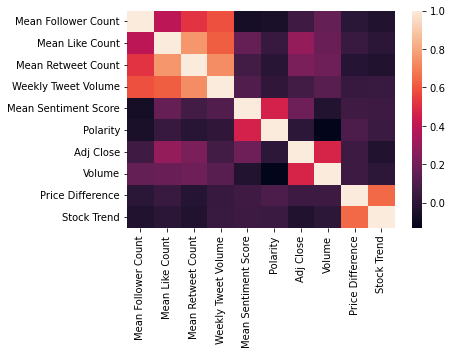

In [25]:
# compute the correlation between all pairs of variables in the data
corr  = data.corr()

# heatmap visualization of the correlation matrix
sns.heatmap(corr)

In [26]:
print(corr)

                      Mean Follower Count  Mean Like Count  \
Mean Follower Count              1.000000         0.392473   
Mean Like Count                  0.392473         1.000000   
Mean Retweet Count               0.517375         0.752717   
Weekly Tweet Volume              0.586859         0.617723   
Mean Sentiment Score            -0.067789         0.167515   
Polarity                        -0.055978         0.034982   
Adj Close                        0.058082         0.291662   
Volume                           0.161090         0.176908   
Price Difference                -0.007513         0.037377   
Stock Trend                     -0.031422        -0.000689   

                      Mean Retweet Count  Weekly Tweet Volume  \
Mean Follower Count             0.517375             0.586859   
Mean Like Count                 0.752717             0.617723   
Mean Retweet Count              1.000000             0.731989   
Weekly Tweet Volume             0.731989             1.00

In [27]:
# data type of each column in the DataFrame 'data'
data.dtypes

Mean Follower Count     float64
Mean Like Count         float64
Mean Retweet Count      float64
Weekly Tweet Volume     float64
Mean Sentiment Score    float64
Polarity                float64
Adj Close               float64
Volume                  float64
Price Difference        float64
Stock Trend               int32
dtype: object

In [28]:
data.isnull().sum()

Mean Follower Count     209
Mean Like Count         209
Mean Retweet Count      209
Weekly Tweet Volume     209
Mean Sentiment Score    209
Polarity                210
Adj Close                 0
Volume                    0
Price Difference          0
Stock Trend               0
dtype: int64

In [29]:
# drop all rows containing null values
data.dropna(inplace=True)

In [30]:
# calculate the Pearson correlation coefficient and p-value between all possible pairs of variables in the data DataFrame for which the p-value is less than 0.05

variables = ["Mean Follower Count", "Mean Like Count", "Mean Retweet Count", "Mean Sentiment Score", "Polarity", "Adj Close", "Volume", "Price Difference", "Stock Trend"]

correlations = []
# iterate over all combinations of variables
for var1, var2 in itertools.combinations(variables, 2):
    corr_coef, p_value = pearsonr(data[var1], data[var2])
    if p_value < 0.05:
        correlations.append((var1, var2, corr_coef, p_value))

# sort the output in descending order based on the correlation coefficient
correlations_sorted = sorted(correlations, key=lambda x: x[2], reverse=True)

# print the sorted output
for var1, var2, corr_coef, p_value in correlations_sorted:
    print(f"{var1} and {var2}: correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.2f}")

Mean Like Count and Mean Retweet Count: correlation coefficient = 0.75, p-value = 0.00
Price Difference and Stock Trend: correlation coefficient = 0.63, p-value = 0.00
Mean Follower Count and Mean Retweet Count: correlation coefficient = 0.52, p-value = 0.00
Mean Sentiment Score and Polarity: correlation coefficient = 0.46, p-value = 0.00
Mean Follower Count and Mean Like Count: correlation coefficient = 0.39, p-value = 0.00
Mean Like Count and Adj Close: correlation coefficient = 0.29, p-value = 0.00
Adj Close and Volume: correlation coefficient = 0.28, p-value = 0.00
Mean Retweet Count and Adj Close: correlation coefficient = 0.22, p-value = 0.00
Mean Retweet Count and Volume: correlation coefficient = 0.19, p-value = 0.00
Mean Sentiment Score and Adj Close: correlation coefficient = 0.19, p-value = 0.00
Mean Like Count and Volume: correlation coefficient = 0.18, p-value = 0.00
Mean Like Count and Mean Sentiment Score: correlation coefficient = 0.17, p-value = 0.00
Mean Follower Coun

# MODEL BUILDING (for Adj. CLose Price using Twitter data only)

### 1.RANDOM FOREST

In [31]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
1       Mean Like Count    0.531350
3   Weekly Tweet Volume    0.237447
4  Mean Sentiment Score    0.085539
2    Mean Retweet Count    0.080117
0   Mean Follower Count    0.063797
5              Polarity    0.001751


The top 3 most important features are 'Mean Like Count','Weekly Tweet Volume' and 'Mean Sentiment Score'

In [32]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [33]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Follower Count, Mean Like Count, Mean Re...",0.701752,2984.159462,0.164452
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.700153,2992.145457,0.164892
2,"(Mean Follower Count, Mean Like Count, Weekly ...",0.692998,3027.636666,0.166848
3,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.692478,3030.198254,0.166989
4,"(Mean Follower Count, Mean Like Count, Weekly ...",0.692076,3032.179960,0.167099
5,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.688789,3048.317210,0.167988
6,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.686348,3060.249816,0.168645
7,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.685255,3065.580865,0.168939
8,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.685247,3065.617653,0.168941
9,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.681429,3084.152883,0.169963


In [34]:
results_df_rf.iloc[0]['X_combinations'] # this pair of variables has the highest r2_score in Random Forest

('Mean Follower Count',
 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score',
 'Polarity')

### 2.GRADIENT BOOSTING REGRESSOR

In [35]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Adj Close']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [36]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.722442,2878.787234,0.158645
1,"(Mean Follower Count, Mean Like Count, Mean Re...",0.709326,2946.020988,0.162351
2,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.708070,2952.381163,0.162701
3,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.703984,2972.970283,0.163836
4,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.698815,2998.814119,0.165260
5,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.697800,3003.861595,0.165538
6,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.696285,3011.383628,0.165953
7,"(Mean Follower Count, Mean Like Count, Mean Re...",0.693410,3025.605601,0.166736
8,"(Mean Follower Count, Mean Like Count, Mean Re...",0.679643,3092.785861,0.170438
9,"(Mean Like Count, Weekly Tweet Volume)",0.678855,3096.588023,0.170648


In [37]:
results_df_gbr.iloc[0]['X_combinations'] # this pair of varibales gives the highest r2_score for Gradient Boosting Regressor

('Mean Like Count', 'Mean Retweet Count', 'Weekly Tweet Volume')

Conclusion: Random Forest gave best results with variables 'Mean Like Count',
 'Mean Retweet Count',
 'Weekly Tweet Volume',
 'Mean Sentiment Score' for model building - Adj. CLose Price using Twitter data

# MODEL BUILDING (for Stock Volume using Twitter data only)

### 1.RANDOM FOREST

In [38]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Random Forest Regressor with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the regressor to the training data
rf.fit(X_train, y_train)

# get the feature importances
importances = rf.feature_importances_

# create a DataFrame to display the importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# sort the DataFrame by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# display the feature importances
print(feature_importances)

                Feature  Importance
1       Mean Like Count    0.321702
0   Mean Follower Count    0.208977
3   Weekly Tweet Volume    0.188854
4  Mean Sentiment Score    0.155560
2    Mean Retweet Count    0.122736
5              Polarity    0.002172


In [39]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = rf.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_rf = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_rf = results_df_rf.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_rf = results_df_rf.reset_index(drop=True)

In [40]:
results_df_rf.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Weekly Tweet Volume, Polarity)",0.124813,37428.042226,0.110826
1,"(Mean Like Count, Mean Sentiment Score)",0.051718,38959.677602,0.115362
2,"(Mean Like Count, Mean Sentiment Score, Polarity)",0.050600,38982.635865,0.115430
3,"(Mean Follower Count, Mean Like Count, Weekly ...",0.041015,39178.920866,0.116011
4,"(Mean Follower Count, Mean Like Count, Mean Se...",0.014779,39711.231365,0.117587
5,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.005249,39902.835641,0.118154
6,"(Mean Like Count, Mean Retweet Count, Weekly T...",0.004718,39913.486120,0.118186
7,"(Mean Follower Count, Mean Like Count, Mean Se...",-0.000945,40026.877184,0.118522
8,"(Weekly Tweet Volume, Polarity)",-0.002244,40052.836611,0.118598
9,"(Mean Follower Count, Mean Like Count, Mean Re...",-0.007926,40166.219741,0.118934


### 2.GRADIENT BOOSTING REGRESSOR

In [41]:
X = data[['Mean Follower Count', 'Mean Like Count', 'Mean Retweet Count',
          'Weekly Tweet Volume', 'Mean Sentiment Score', 'Polarity']]
y = data['Volume']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get all possible pairs, triplets, quadruplets, and quintuplets of X variables
X_combinations = []
for r in range(2, 7):
    X_combinations += list(combinations(X_train.columns, r))

# create empty lists to store the results
r2_scores = []
rmse_values = []
norm_rmse_values = []

# loop over each combination of X variables
for X_comb in X_combinations:
    # select the X variables for this combination
    X_train_comb = X_train[list(X_comb)]
    X_test_comb = X_test[list(X_comb)]
    
    # create a RandomForestRegressor model and fit it to the training data
    gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr.fit(X_train_comb, y_train)
    
    # use the model to predict on the test data
    y_pred = gbr.predict(X_test_comb)
    
    # compute the r2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # compute the rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    
    # compute the normalized rmse
    norm_rmse = rmse / (y_test.max() - y_test.min())
    norm_rmse_values.append(norm_rmse)

# create a DataFrame to store the results
results_df_gbr = pd.DataFrame({
    'X_combinations': X_combinations,
    'r2_scores': r2_scores,
    'rmse_values': rmse_values,
    'norm_rmse_values': norm_rmse_values
})

# sort the DataFrame by R-squared score in descending order
results_df_gbr = results_df_gbr.sort_values(by='r2_scores', ascending=False)

# reset the index of the DataFrame
results_df_gbr = results_df_gbr.reset_index(drop=True)

In [42]:
results_df_gbr.head(10)

,X_combinations,r2_scores,rmse_values,norm_rmse_values
0,"(Mean Like Count, Weekly Tweet Volume, Polarity)",0.138726,37129.333762,0.109942
1,"(Mean Follower Count, Mean Like Count, Weekly ...",0.110072,37741.919311,0.111756
2,"(Mean Follower Count, Mean Like Count, Mean Re...",0.092345,38115.980364,0.112863
3,"(Mean Retweet Count, Mean Sentiment Score, Pol...",0.083083,38309.946235,0.113438
4,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.078909,38397.051481,0.113696
5,"(Mean Retweet Count, Mean Sentiment Score)",0.077722,38421.794479,0.113769
6,"(Mean Like Count, Weekly Tweet Volume, Mean Se...",0.074726,38484.138878,0.113953
7,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.060282,38783.349129,0.114839
8,"(Mean Like Count, Mean Retweet Count, Mean Sen...",0.055019,38891.812936,0.115161
9,"(Mean Follower Count, Mean Like Count, Mean Re...",0.054326,38906.065672,0.115203


Conclusion: Both the models i.e. Random Forest and Gradient Boosting Regressor gave bad results for model building - stock volume using twitter data